<a href="https://colab.research.google.com/github/Kanishkshriv/Paisabazar-fruad-detection/blob/main/Paisabazar_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name - Paisabazar Fraud Analysis**

# **Project Summary**

In this project, we aimed to analyze and predict credit scores based on customer data from Paisabazaar. The goal was to build a machine learning model that can classify customers into different credit score categories (Poor, Standard, Good) based on factors like income, credit card usage, payment behavior, and debt history.

## **Importing All the necessary Required Libraries**

In [ ]:
import pandas as pd                 # pandas is beng used for handling and manuplating the dataset
import numpy as np                  # numpy is used fo rnumerical operations
import matplotlib.pyplot as plt
import seaborn as sns               # matplotlib and seaborn is used for data visualisation
import plotly.express as px         # plotyexpress is being used for interactive visualisations

In [ ]:
from sklearn.model_selection import train_test_split                 #USed to split the data dataset into traning and test sets
from sklearn.preprocessing import LabelEncoder , StandardScaler      #Converts categorial variables into numerical values and standard scalar values bring then to a common scale.
from sklearn.ensemble import RandomForestClassifier                  #The machine learning model used for classication
from sklearn.metrics import classification_report, accuracy_score    #used to evaluate model performance

## **Loading the dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/csv files/dataset.csv")

# **Dropping unnecessary columns**

In [ ]:
df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN', 'Month'], inplace=True)  #we aint need these all columns

# **Encoding the categorial and target variable**

In [ ]:
# Encode categorical variables
label_cols = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Occupation', 'Type_of_Loan']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [ ]:
#Encode Target variable
credit_score_mapping = {"Poor" : 0, "Standard" : 1, "Good" : 2}
df['Credit_Score'] = df['Credit_Score'].map(credit_score_mapping)


In [ ]:
df['Credit_Score'] = df['Credit_Score'].fillna(df['Credit_Score'].mode()[0])


# **Handling Missing Values**

In [ ]:
df.fillna(df.median(), inplace=True) #if the columns has missing values then the gaps will be filled with the median of that column

# **Scaling Numerical Values / Feature Scaling**

In [ ]:
num_cols = ["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts",
            "Num_Credit_Card", "Outstanding_Debt", "Total_EMI_per_month",
            "Credit_Utilization_Ratio", 'Credit_History_Age',
            'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
            'Changed_Credit_Limit', 'Amount_invested_monthly', 'Monthly_Balance']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])   # Standard scale tranforms the data to haev zero mean and unit variance

# **Splitting The Dataset**

In [ ]:
X = df.drop(columns=['Credit_Score'])  #x contains all the independent features i.e things except credit score
y = df['Credit_Score']                 #y contain dependent like credit score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Training the model**

In [ ]:
#Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)    # Randomforest classifier is ued for classification
model.fit(X_train, y_train)#It takes pattern from the X_train dataset to predict credit_score


RandomForestClassifier(random_state=42)

# **Making Predictions**

In [ ]:
y_pred = model.predict(X_test)

# **Evaluating the Model**

In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      5874
           1       0.84      0.82      0.83     10599
           2       0.79      0.77      0.78      3527

    accuracy                           0.82     20000
   macro avg       0.81      0.82      0.81     20000
weighted avg       0.82      0.82      0.82     20000

Accuracy: 0.82055


# **Feature importance visualisation**

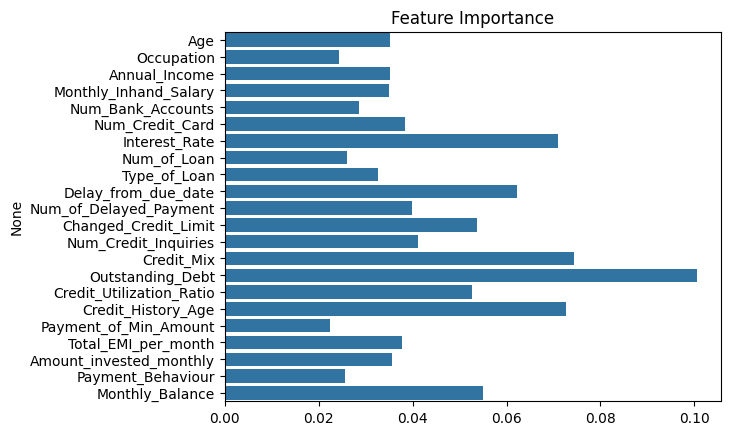

In [ ]:
importances = model.feature_importances_
features = X.columns
sns.barplot(x= importances, y=features)
plt.title("Feature Importance")
plt.show()

# **Conclusion**

So By this project we concluded that outstanding Debt is one of the most important factor, while providing the credit and Interest Rae , Credit Mix , Credit History Age are also one of the most important factor while providing the credit. If these things are taken care off and properly evaluated then the chance of Fraud can be Minimal.